In [4]:
import pandas as pd

# Путь к загруженному файлу
file_path = 'Данные для тестового задания.xlsx'  # Remove the leading '/'

# Чтение файла Excel и просмотр доступных листов
excel_file = pd.ExcelFile(file_path)
excel_file.sheet_names


['Данные об аудитории', 'Данные АБ тестов', 'Листеры']

In [5]:
# Загрузка данных с листа "Данные об аудитории"
audience_data = excel_file.parse('Данные об аудитории')

# Просмотр первых строк и структуры данных
audience_data.head(), audience_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16814 entries, 0 to 16813
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          16814 non-null  datetime64[ns]
 1   user_id       16814 non-null  object        
 2   view_adverts  16814 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 394.2+ KB


(        date                               user_id  view_adverts
 0 2023-11-11  8c020470-8461-11ed-83d0-552e8cc749d6            13
 1 2023-11-18  5875f070-7b92-11ee-a6fb-8b298e83f4f7            14
 2 2023-11-29  3c2d27c0-4fd6-11eb-b89f-2ffb31b67dd6            21
 3 2023-11-29  234a96d0-ad16-11ed-a2e6-793ddfeeba1f            23
 4 2023-11-29  4d07c180-644f-11eb-879c-b7c02edf4f37            12,
 None)

In [6]:
# Выделение пользователей за ноябрь
november_data = audience_data[audience_data['date'].dt.month == 11]

# Расчет MAU: количество уникальных user_id за ноябрь
mau = november_data['user_id'].nunique()
mau


7639

In [7]:
# Расчет DAU: среднее количество уникальных пользователей в день
dau = november_data.groupby('date')['user_id'].nunique().mean()
dau


560.4666666666667

In [10]:
# Question 3: Retention for users who joined on 1st November
# Identify users who joined on 1st November
nov_1_users = audience_data[audience_data['date'] == '2023-11-01']['user_id'].unique()
# Find users who returned on 2nd November
nov_2_users = audience_data[audience_data['date'] == '2023-11-02']['user_id'].unique()
# Calculate retention
retention = len(set(nov_1_users) & set(nov_2_users)) / len(nov_1_users) * 100 if len(nov_1_users) > 0 else 0
print(retention)

26.64526484751204


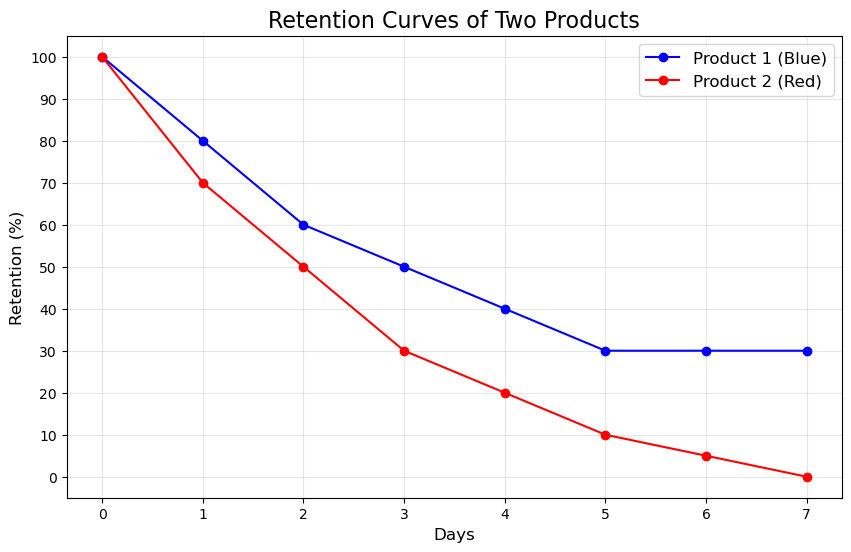

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Example retention data for two products
days = np.arange(8)  # Day 0 to Day 7
product_1_retention = [100, 80, 60, 50, 40, 30, 30, 30]  # Smoother decline (blue curve)
product_2_retention = [100, 70, 50, 30, 20, 10, 5, 0]    # Steeper decline (red curve)

# Plot the retention curves
plt.figure(figsize=(10, 6))
plt.plot(days, product_1_retention, label='Product 1 (Blue)', color='blue', marker='o', linestyle='-')
plt.plot(days, product_2_retention, label='Product 2 (Red)', color='red', marker='o', linestyle='-')

# Add titles and labels
plt.title('Retention Curves of Two Products', fontsize=16)
plt.xlabel('Days', fontsize=12)
plt.ylabel('Retention (%)', fontsize=12)
plt.xticks(days)
plt.yticks(range(0, 110, 10))
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()


In [12]:
# Filter data for November
november_data = audience_data[audience_data['date'].dt.month == 11]

# Calculate the number of users who viewed at least one ad and the total number of users
users_with_views = november_data[november_data['view_adverts'] > 0]['user_id'].nunique()
total_users = november_data['user_id'].nunique()

# Calculate the user conversion rate
conversion_rate = (users_with_views / total_users) * 100
conversion_rate


46.31496269145176

In [13]:
# Calculate the average number of viewed adverts per user in November
average_views_per_user = november_data.groupby('user_id')['view_adverts'].sum().mean()
average_views_per_user


2.8687000916350307

In [14]:
# Data from the survey (replace with your actual numbers if different)
total_users = 2000
promoters = 1200
passives = 300
detractors = 500

# Calculate percentages
promoter_percentage = (promoters / total_users) * 100
detractor_percentage = (detractors / total_users) * 100

# Calculate NPS
nps = promoter_percentage - detractor_percentage

print(f"The Net Promoter Score (NPS) is: {nps:.2f}") 

The Net Promoter Score (NPS) is: 35.00


In [24]:
from scipy.stats import ttest_ind

# Загрузка данных с вкладки "Данные АБ-тестов"
ab_test_data = pd.read_excel(file_path, sheet_name='Данные АБ тестов')

# Группировка данных по экспериментам и группам
experiment_results = []
for exp_num in ab_test_data['experiment_num'].unique():
    experiment = ab_test_data[ab_test_data['experiment_num'] == exp_num]
    
    # Разделяем на контрольную и тестовую группы
    control_group = experiment[experiment['experiment_group'] == 'control']['revenue']
    test_group = experiment[experiment['experiment_group'] == 'test']['revenue']
    
    # Выполняем t-тест
    stat, p_value = ttest_ind(control_group, test_group, equal_var=False)
    experiment_results.append((exp_num, p_value))

# Вывод результатов
for exp, p in experiment_results:
    print(f'Эксперимент {exp}: p-value = {p}')


Эксперимент 1: p-value = 0.688966190624939
Эксперимент 2: p-value = 0.0011282266247294027
Эксперимент 3: p-value = 0.06031548002841902


In [25]:
# Подсчет среднего дохода на пользователя
mean_revenue_per_user = ab_test_data['revenue'].sum() / ab_test_data['user_id'].nunique()
print(f'Средний доход на пользователя: {mean_revenue_per_user:.2f}')


Средний доход на пользователя: 2043.09


In [29]:
import pandas as pd

# Загрузка данных
file_path = 'Данные для тестового задания.xlsx'
data = pd.read_excel(file_path, sheet_name='Листеры')

# Проверяем структуру данных
print(data.head())

# Подсчёт среднего дохода
total_revenue = data['revenue'].sum()  # Общая выручка
unique_users = data['user_id'].nunique()  # Уникальные пользователи

# Средний доход на пользователя
mean_revenue_per_user = total_revenue / unique_users
print(f"Средний доход на пользователя: {mean_revenue_per_user:.2f}")


   user_id       date  cnt_adverts  age  cnt_contacts  revenue
0      100 2022-01-01            6   21           119       53
1      100 2022-01-02            2   21           200       18
2      100 2022-01-03            6   21           193       42
3      100 2022-01-04            2   21           143       38
4      100 2022-01-05            2   21           190       40
Средний доход на пользователя: 156.48


In [26]:
# Загрузка данных из листеров
list_data = pd.read_excel(file_path, sheet_name='Листеры')

# Расчет медианы возраста
median_age = list_data['age'].median()
print(f'Медиана возраста пользователей: {median_age}')


Медиана возраста пользователей: 28.0


In [27]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Данные эксперимента
visitors_A = 100047501  # Количество посетителей в группе A
payments_A = 1003       # Количество платежей в группе A

visitors_B = 100001055  # Количество посетителей в группе B
payments_B = 1099       # Количество платежей в группе B

# Конверсии
cr_A = payments_A / visitors_A  # Конверсия группы A
cr_B = payments_B / visitors_B  # Конверсия группы B

# Расчет объединенной конверсии
pooled_conversion = (payments_A + payments_B) / (visitors_A + visitors_B)

# Z-тест для проверки значимости разницы между пропорциями
counts = np.array([payments_A, payments_B])  # Количество успехов (платежей)
nobs = np.array([visitors_A, visitors_B])    # Общее количество наблюдений (посетителей)

z_stat, p_value = proportions_ztest(counts, nobs)

cr_A, cr_B, pooled_conversion, z_stat, p_value


(1.0025237911739544e-05,
 1.0989884056723202e-05,
 1.0507449001531408e-05,
 -2.1045506019397746,
 0.03533044544854254)

In [28]:
from scipy.stats import norm

# Конверсии и размеры выборок
n_A = 100047501
x_A = 1003
n_B = 100001055
x_B = 1099

# Конверсия (пропорция)
p_A = x_A / n_A
p_B = x_B / n_B

# Объединенная пропорция
p_pooled = (x_A + x_B) / (n_A + n_B)

# Стандартная ошибка
SE = (p_pooled * (1 - p_pooled) * (1 / n_A + 1 / n_B))**0.5

# Z-статистика
z = (p_B - p_A) / SE

# p-значение (двусторонний тест)
p_value = 2 * (1 - norm.cdf(abs(z)))

print(f"Z-статистика: {z:.2f}")
print(f"p-значение: {p_value:.3f}")

alpha = 0.05
if p_value < alpha:
    print("Различие статистически значимо. Вариант B лучше.")
else:
    print("Различие не статистически значимо.")

Z-статистика: 2.10
p-значение: 0.035
Различие статистически значимо. Вариант B лучше.
